In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
#adding some noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

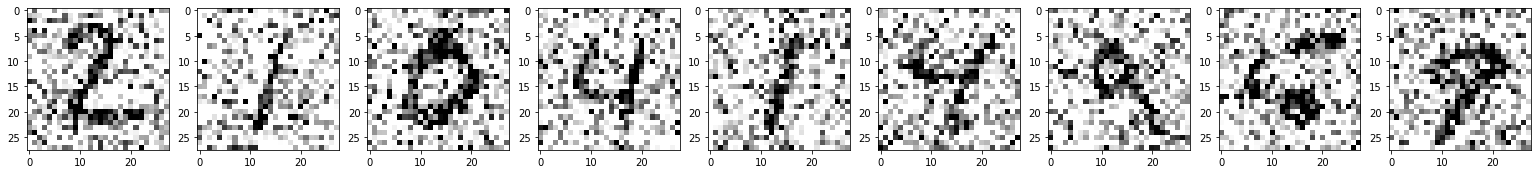

In [ ]:
#Displaying images with noise
plt.figure(figsize=(30, 10))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
plt.show()

In [12]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
 
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 8)         2312      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 4, 4, 8)          

In [10]:
model.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True, 
          validation_data=(x_test_noisy, x_test))

Epoch 1/10
235/235 [==============================] - 119s 505ms/step - loss: 0.0597 - val_loss: 0.0420
Epoch 2/10
235/235 [==============================] - 120s 510ms/step - loss: 0.0369 - val_loss: 0.0331
Epoch 3/10
235/235 [==============================] - 120s 510ms/step - loss: 0.0315 - val_loss: 0.0296
Epoch 4/10
235/235 [==============================] - 121s 515ms/step - loss: 0.0289 - val_loss: 0.0276
Epoch 5/10
235/235 [==============================] - 122s 520ms/step - loss: 0.0273 - val_loss: 0.0265
Epoch 6/10
235/235 [==============================] - 121s 517ms/step - loss: 0.0261 - val_loss: 0.0253
Epoch 7/10
235/235 [==============================] - 122s 518ms/step - loss: 0.0253 - val_loss: 0.0246
Epoch 8/10
235/235 [==============================] - 121s 516ms/step - loss: 0.0246 - val_loss: 0.0243
Epoch 9/10
235/235 [==============================] - 122s 519ms/step - loss: 0.0241 - val_loss: 0.0237
Epoch 10/10
235/235 [==============================] - 123s 523m

In [11]:
model.evaluate(x_test_noisy, x_test)

313/313 [==============================] - 6s 20ms/step - loss: 0.0230


0.023041462525725365

In [14]:
no_noise_img = model.predict(x_test_noisy)

plt.figure(figsize=(40, 6))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(no_noise_img[i].reshape(28, 28), cmap="binary")

plt.show()

'no_noise_img = model.predict(x_test_noisy)\n\nplt.figure(figsize=(40, 6))\nfor i in range(10):\n    # display original\n    ax = plt.subplot(3, 20, i + 1)\n    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")\n    \n    # display reconstructed (after noise removed) image\n    ax = plt.subplot(3, 20, 40 +i+ 1)\n    plt.imshow(no_noise_img[i].reshape(28, 28), cmap="binary")\n\nplt.show()'